In [4]:
pip install scikit-learn

  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.0/38.5 MB 3.1 MB/s eta 0:00:12
   - -------------------------------------- 1.8/38.5 MB 3.2 MB/s eta 0:00:12
   -- ------------------------------------- 2.9/38.5 MB 3.6 MB/s eta 0:00:10
   ---- ----------------------------------- 4.2/38.5 MB 4.3 MB/s eta 0:00:09
   ----- ---------------------------------- 5.5/38.5 MB 4.6 MB/s eta 0:00:08
   ------- -------------------------------- 6.8/38.5 MB 4.9 MB/s eta 0:00:07
   -------- ------------------------------- 8.7/38.5 MB 5.4 MB/

In [5]:
pip install scikit-learn imbalanced-learn seaborn matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp312-cp312-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ----------------------------------------  0/10 [pyparsing]
   ---------

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('creditcard.csv')
print(df['Class'].value_counts())

Class
0    3
1    2
Name: count, dtype: int64


In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

Confusion Matrix:
[[0 2]
 [0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



c:\Users\Akhil\OneDrive\Desktop\streamlit\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Akhil\OneDrive\Desktop\streamlit\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Akhil\OneDrive\Desktop\streamlit\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

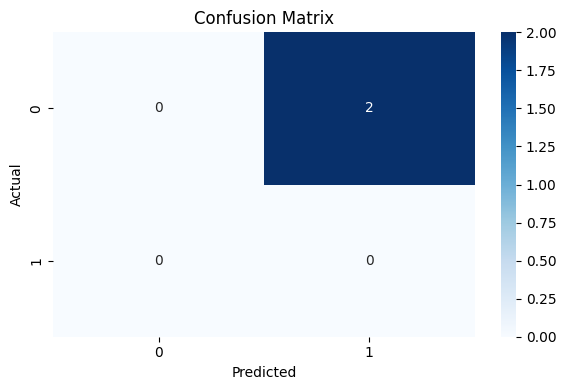

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.3, random_state=42
)

# Step 4: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Predict and Evaluate
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6 (Optional): Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()